In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("labeling_df.csv")

In [3]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000,-0.150
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000,0.000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692,0.425
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053,0.000
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519,-0.350


In [4]:
df1 = df.drop(['year','month','day','user_name','favorite_count','retweet_count','user_location_ab','word_count','char_count','average_word_len'],axis=1)

In [5]:
df1.head()

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350


In [6]:
df1.isna().any()

text        False
polarity    False
dtype: bool

In [7]:
df1['sentiment'] = pd.cut(df1.polarity,
                         bins=[-1.1,-0.5,-0.1,0.1,0.5,1],
                         labels=[0,1,2,3,4])

In [8]:
df1.head()

,text,polarity,sentiment
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150,1
1,Urgent-health care planning must be based on a...,0.000,2
2,This research project is focused on making pri...,0.425,3
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000,2
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350,1


In [9]:
df1.count()

text         294528
polarity     294528
sentiment    294528
dtype: int64

In [10]:
df2 = df1.drop_duplicates()

In [11]:
df2.count()
# Compared with df1, there have 128666 tweets are duplicated. 

text         165862
polarity     165862
sentiment    165862
dtype: int64

In [12]:
#I choosed the dupilicates removed dataset df2 to be continue.

In [13]:
neg_phrases = df2[df2.sentiment == 0]

In [14]:
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

['RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResistance #p2 https://t.co/8n6V9sXSXV',
 "I'm sorry if i did something wrong. https://t.co/OVDUfXe8xR",
 "RT @Tom_Parkin_: Too bad Trump didn't tell Justin to  increase healthcare, childcare or housing spending. https://t.co/2ifyfT9uPn",
 '@POTUS you are disgusting. Millions will be without healthcare and you gloat. 👎🏼']

In [15]:
neg_text = pd.Series(neg_words).str.cat(sep=" ")
neg_text[:100]

'RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResista'

In [16]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

In [17]:
pos_phrases = df2[df2.sentiment == 4]
pos_words = []
for t in pos_phrases.text:
    pos_words.append(t)
pos_words[:4]

["RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's health care plan https://t.co/j7JE4N62ec",
 'RT @SchlegelVillage: Thrilled to welcome Dr. Bob Bell, Deputy Minister of Health &amp; Long-Term Care to the Innovation Summit. #SVInnovates @O…',
 "RT @funder: Karen Handel denies climate science—thinks being gay is wrong—Anti-women's rights—Supports Trumpcare—She's perfect for GOP Cong…",
 'RT @sahilkapur: "We know this is not the best way to do health care," says @LindseyGrahamSC. "But it\'s the way we\'re having to do it."']

In [18]:
pos_text = pd.Series(pos_words).str.cat(sep=" ")
pos_text[:100]

"RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's hea"

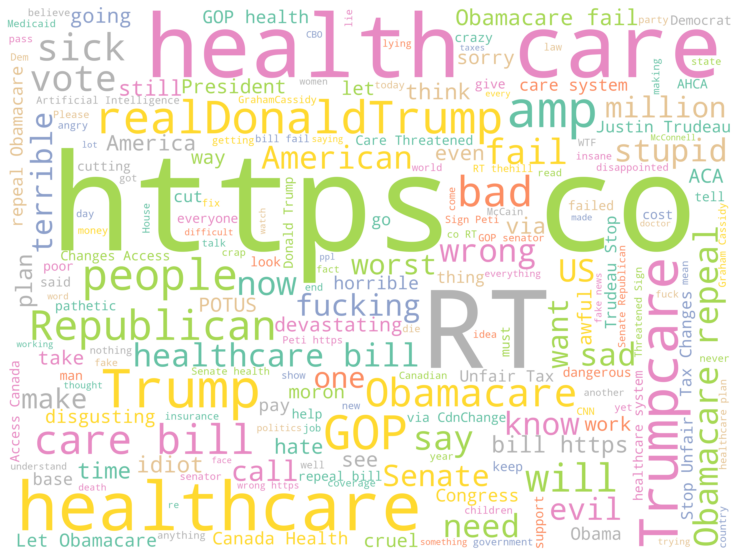

In [19]:
# 1.1 Word Cloud for negative health care tweets
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(neg_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

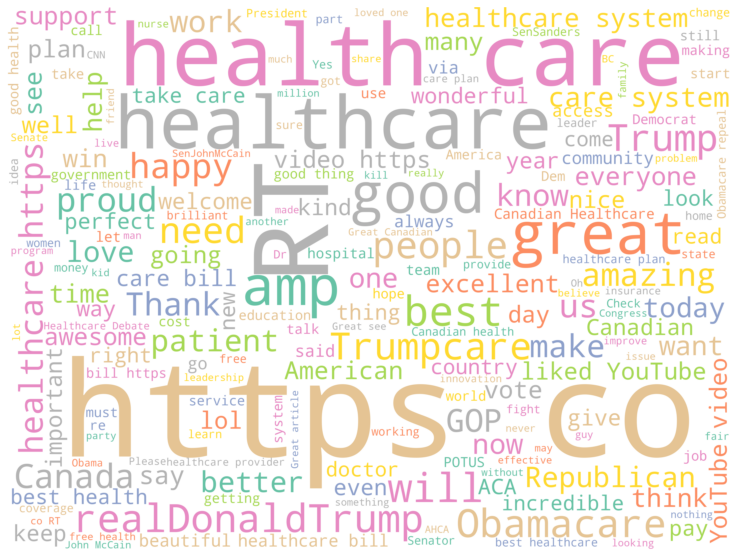

In [20]:
# 1.2 Word Cloud for positive health care tweets
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(pos_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#2. Term Frequancy (Unigram)

In [22]:
#2.1 Term Frequancy for negative sentiments

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(ngram_range=(1,1), stop_words ='english')
cvector.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [24]:
len(cvector.get_feature_names())

209192

In [25]:
neg_matrix = cvector.transform(df2[df2.sentiment == 0].text)
sli_neg_matrix = cvector.transform(df2[df2.sentiment == 1].text)
neu_matrix = cvector.transform(df2[df2.sentiment == 2].text)
sli_pos_matrix = cvector.transform(df2[df2.sentiment == 3].text)
pos_matrix = cvector.transform(df2[df2.sentiment == 4].text)

In [26]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

In [27]:
neg_tf.head(10)

,Terms,negative
0,https,4636
1,rt,3420
2,health,1898
3,care,1808
4,healthcare,1625
5,obamacare,1075
6,trump,849
7,gop,656
8,trumpcare,620
9,amp,495


In [28]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head(10)

,negative
Terms,
https,4636
rt,3420
health,1898
care,1808
healthcare,1625
obamacare,1075
trump,849
gop,656
trumpcare,620


In [29]:
#2.2 Term Frequancy for slight-negative sentiments

In [30]:
sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')
sli_neg_tf_df.head(10)

,slight-negative
Terms,
https,12241
rt,9655
health,6968
care,6620
healthcare,5384
obamacare,2471
trump,1999
amp,1837
gop,1736


In [31]:
#2.3 Term Frequancy for neutral sentiments

In [32]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head(10)

,neutral
Terms,
https,66569
rt,42466
health,29449
care,28178
healthcare,26526
obamacare,10467
trump,7288
amp,7283
gop,6058


In [33]:
#2.4 Term Frequancy for slight-positive sentiments

In [34]:
sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')
sli_pos_words_tf_df.head(10)

,slight-positive
Terms,
https,29572
rt,20052
health,16673
care,16325
healthcare,15267
amp,4325
obamacare,3692
new,3535
right,2850


In [35]:
#2.5 Term Frequancy for positive sentiments

In [36]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head(10)

,positive
Terms,
https,6476
rt,3877
healthcare,3148
care,3022
health,2935
great,1749
good,1417
amp,885
best,818


In [37]:
#2.6 Total term frequence of all the 5 sentiment classes

In [38]:

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [39]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,slight-negative,neutral,slight-positive,positive,total
https,4636,12241,66569,29572,6476,119494
rt,3420,9655,42466,20052,3877,79470
health,1898,6968,29449,16673,2935,57923
care,1808,6620,28178,16325,3022,55953
healthcare,1625,5384,26526,15267,3148,51950
obamacare,1075,2471,10467,3692,668,18373
amp,495,1837,7283,4325,885,14825
trump,849,1999,7288,2818,538,13492
gop,656,1736,6058,2638,412,11500
people,441,1486,4072,2760,451,9210


Text(0.5, 1.0, 'Top 500 phrases in healthcare tweets')

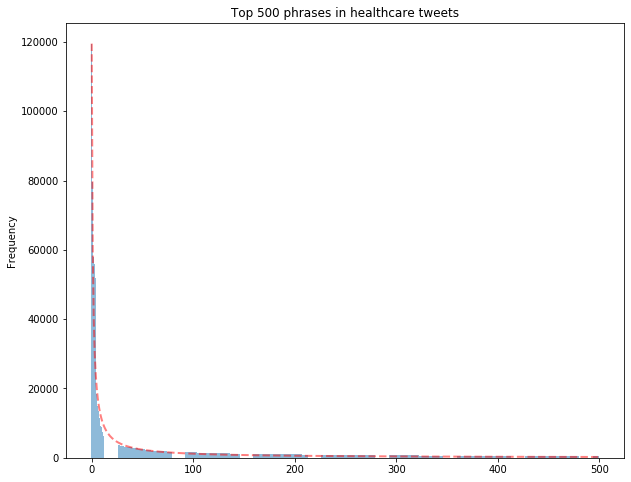

In [40]:
#2.7 Frequency plot of top frequent 500 phrases in healthcare tweets
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in healthcare tweets')


In [41]:
#2.8 Plot of Absolute frequency of phrases against their rank

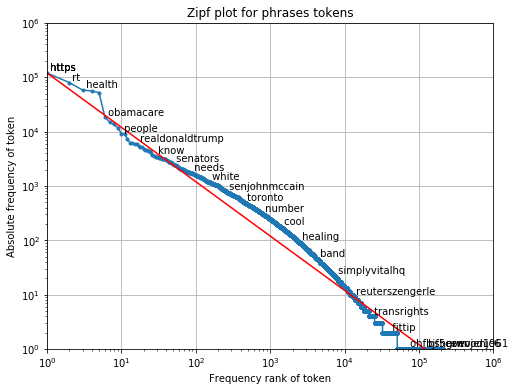

In [42]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [43]:
#2.9 Tokens Visualisation

In [156]:

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(max_df = 0.5,stop_words='english',ngram_range=(1, 3))
cvec.fit(df2.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.5, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [157]:
neg_matrix = cvec.transform(df2[df2.sentiment == 0].text)
sli_neg_matrix = cvec.transform(df2[df2.sentiment == 1].text)
neu_matrix = cvec.transform(df2[df2.sentiment == 2].text)
sli_pos_matrix = cvec.transform(df2[df2.sentiment == 3].text)
pos_matrix = cvec.transform(df2[df2.sentiment == 4].text)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')

sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,negative,slight-negative,neutral,slight-positive,positive,total
rt,3420,9655,42466,20052,3877,79470
health,1898,6968,29449,16673,2935,57923
care,1808,6620,28178,16325,3022,55953
healthcare,1625,5384,26526,15267,3148,51950
health care,1611,5228,22791,12631,2277,44538
obamacare,1075,2471,10467,3692,668,18373
amp,495,1837,7283,4325,885,14825
trump,849,1999,7288,2818,538,13492
gop,656,1736,6058,2638,412,11500
people,441,1486,4072,2760,451,9210


Text(0.5, 1.0, 'Top 50 tokens in negative healthcare')

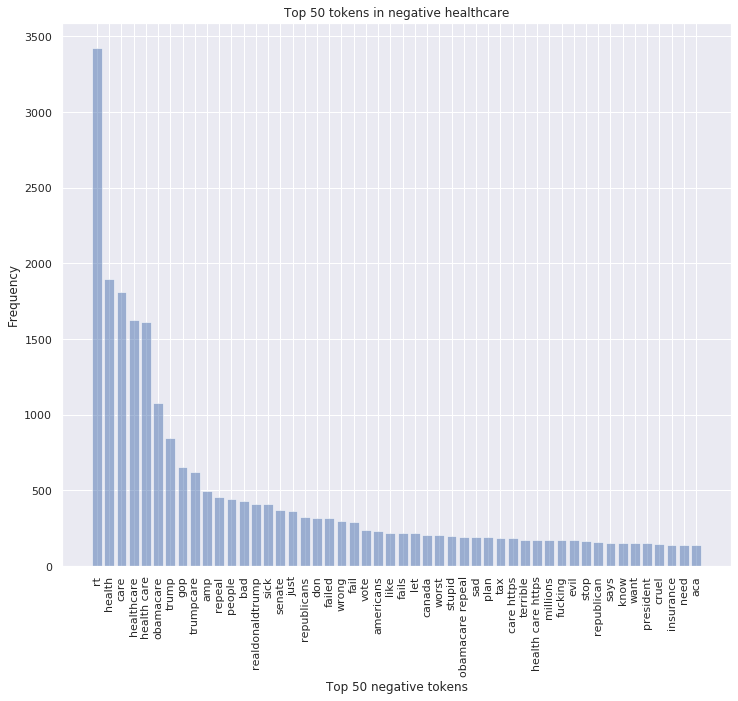

In [158]:

y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative healthcare')


Text(0.5, 1.0, 'Top 50 tokens in positive healthcare')

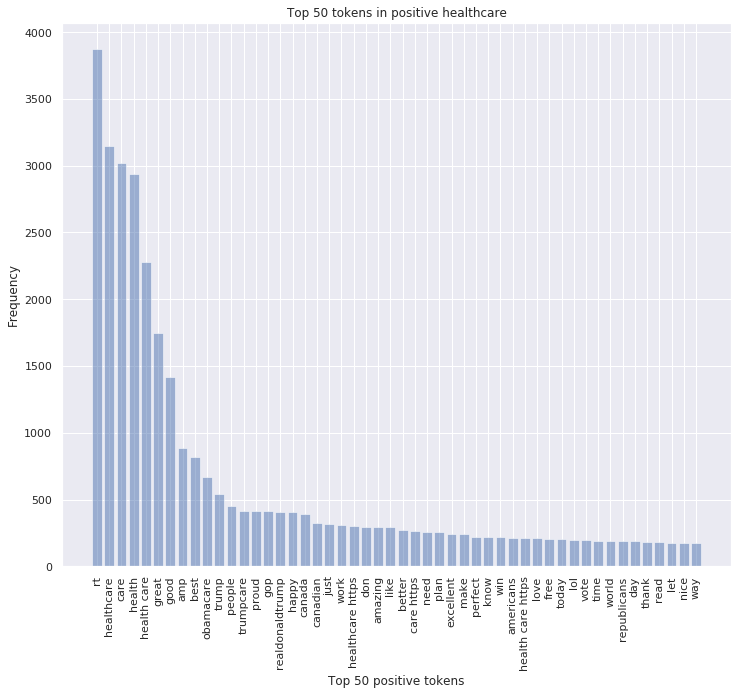

In [159]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive healthcare')


In [48]:
#3 Supervised Machine Learning Models

In [49]:
#3.1 Model selection
# Split whole data to train and test datasets, 80% for trainning, 20% for testing

In [50]:
phrase = np.array(df2['text'])
sentiments = np.array(df2['sentiment'])

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [51]:
performace_metrics = pd.DataFrame(columns=['accuracy','F1_score','training-time'], 
                                  index=['logisticRegression_Unigram','logisticRegression_Bigram','logisticRegression_Trigram',
                                         'RandomForest_Unigram','RandomForest_Bigram','RandomForest_Trigram',
                                         'LinearSVC_Unigram','LinearSVC_Bigram','LinearSVC_Trigram'])

In [52]:
#3.2 Implementation of TF-IDF on N-grams

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# apply stop_words, select 10% of the top features

#<1> build TF-IDF features on unigram
tv1 = TfidfVectorizer(ngram_range=(1,1),sublinear_tf=True, max_df=0.5, stop_words='english')
tv1_train_features = tv1.fit_transform(phrase_train)
tv1_test_features = tv1.transform(phrase_test)

#<2> build TF-IDF features on bigram
tv2 = TfidfVectorizer(ngram_range=(1,2),sublinear_tf=True, max_df=0.5, stop_words='english')
tv2_train_features = tv2.fit_transform(phrase_train)
tv2_test_features = tv2.transform(phrase_test)

#<3> build TF-IDF features on trigram
tv3 = TfidfVectorizer(ngram_range=(1,3),sublinear_tf=True, max_df=0.5, stop_words='english')
tv3_train_features = tv3.fit_transform(phrase_train)
tv3_test_features = tv3.transform(phrase_test)

In [54]:

print('TFIDF Unigram model:> Train features shape:', tv1_train_features.shape, ' Test features shape:', tv1_test_features.shape)
print('TFIDF Bigram model:> Train features shape:', tv2_train_features.shape, ' Test features shape:', tv2_test_features.shape)
print('TFIDF Trigram model:> Train features shape:', tv3_train_features.shape, ' Test features shape:', tv3_test_features.shape)

TFIDF Unigram model:> Train features shape: (132689, 176835)  Test features shape: (33173, 176835)
TFIDF Bigram model:> Train features shape: (132689, 936507)  Test features shape: (33173, 936507)
TFIDF Trigram model:> Train features shape: (132689, 1948714)  Test features shape: (33173, 1948714)


In [55]:
#3.3 Logistic Regression model 

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1360
           1       0.66      0.43      0.52      3823
           2       0.76      0.91      0.82     17275
           3       0.77      0.66      0.71      8863
           4       0.69      0.54      0.61      1852

    accuracy                           0.75     33173
   macro avg       0.71      0.59      0.63     33173
weighted avg       0.74      0.75      0.73     33173


Accuracy: 0.7462

Weighted Averaged Validation Metrics
Precision Score: 0.7409
Recall Score: 0.7462
F1 Score: 0.7339
Processing time: 6.600661993026733



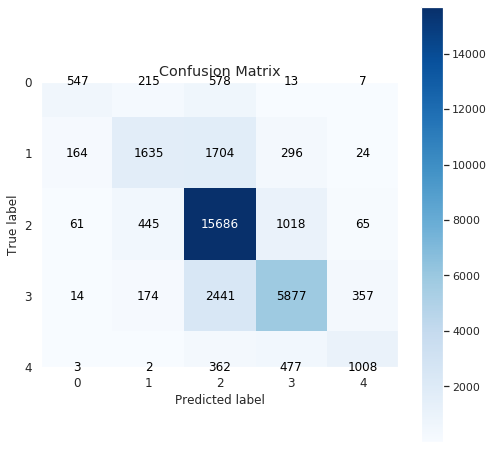

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import time

# <1> Unigram LogisticRegression

start_time = time.time()
lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1)
lr.fit(tv1_train_features,sentiments_train)
predictions = lr.predict(tv1_test_features)

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['logisticRegression_Unigram']['training-time'] = time.time() - start_time
performace_metrics.loc['logisticRegression_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['logisticRegression_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')


              precision    recall  f1-score   support

           0       0.72      0.32      0.45      1360
           1       0.67      0.41      0.51      3823
           2       0.74      0.91      0.82     17275
           3       0.76      0.65      0.70      8863
           4       0.67      0.52      0.59      1852

    accuracy                           0.74     33173
   macro avg       0.71      0.56      0.61     33173
weighted avg       0.73      0.74      0.72     33173


Accuracy: 0.7386

Weighted Averaged Validation Metrics
Precision Score: 0.7344
Recall Score: 0.7386
F1 Score: 0.724
Processing time: 13.398779392242432



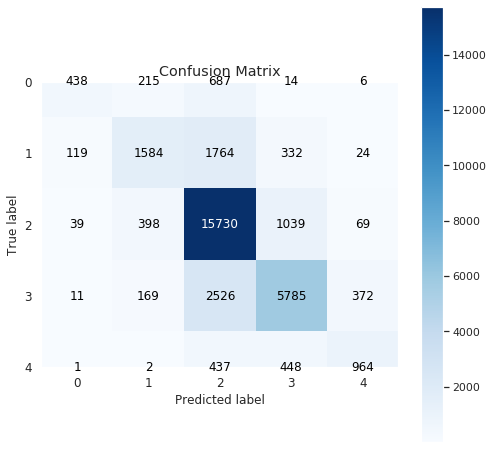

In [57]:
# <2> Bigram LogisticRegression

start_time = time.time()
lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1)
lr.fit(tv2_train_features,sentiments_train) # Bigram
predictions = lr.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['logisticRegression_Bigram']['training-time'] = time.time() - start_time
performace_metrics.loc['logisticRegression_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['logisticRegression_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')


              precision    recall  f1-score   support

           0       0.72      0.29      0.42      1360
           1       0.66      0.41      0.51      3823
           2       0.74      0.91      0.82     17275
           3       0.75      0.65      0.70      8863
           4       0.66      0.52      0.58      1852

    accuracy                           0.73     33173
   macro avg       0.71      0.56      0.60     33173
weighted avg       0.73      0.73      0.72     33173


Accuracy: 0.7346

Weighted Averaged Validation Metrics
Precision Score: 0.7303
Recall Score: 0.7346
F1 Score: 0.7194
Processing time: 18.664435386657715



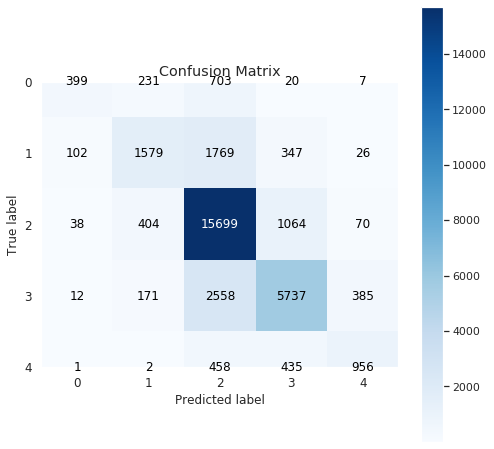

In [58]:
# <3> Trigram LogisticRegression

start_time = time.time()
lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1)
lr.fit(tv3_train_features,sentiments_train) # Trigram
predictions = lr.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['logisticRegression_Trigram']['training-time'] = time.time() - start_time
performace_metrics.loc['logisticRegression_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['logisticRegression_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

In [59]:
#3.4 Support Vector Machine(SVM) 
# LinearSVC

from sklearn.svm import LinearSVC

              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1360
           1       0.65      0.56      0.60      3823
           2       0.81      0.88      0.84     17275
           3       0.76      0.71      0.73      8863
           4       0.73      0.64      0.68      1852

    accuracy                           0.77     33173
   macro avg       0.73      0.68      0.70     33173
weighted avg       0.77      0.77      0.77     33173


Accuracy: 0.7709

Weighted Averaged Validation Metrics
Precision Score: 0.7664
Recall Score: 0.7709
F1 Score: 0.7668
Processing time: 4.344928979873657



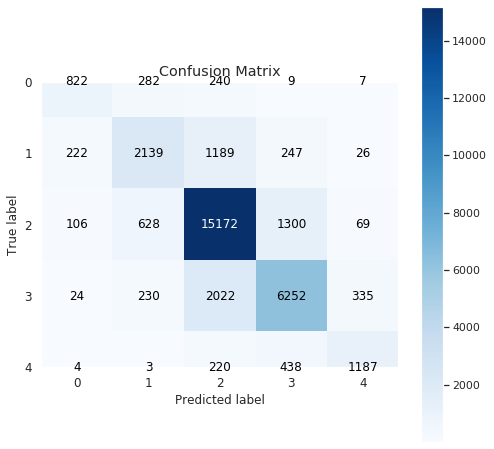

In [60]:
# <1> Unigram LinearSVC

start_time = time.time()
clf = LinearSVC(multi_class='ovr', random_state=1)
clf.fit(tv1_train_features,sentiments_train)
predictions = clf.predict(tv1_test_features)

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['LinearSVC_Unigram']['training-time'] = time.time() - start_time
performace_metrics.loc['LinearSVC_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['LinearSVC_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

              precision    recall  f1-score   support

           0       0.70      0.60      0.64      1360
           1       0.69      0.61      0.65      3823
           2       0.84      0.88      0.86     17275
           3       0.77      0.75      0.76      8863
           4       0.71      0.67      0.69      1852

    accuracy                           0.79     33173
   macro avg       0.74      0.70      0.72     33173
weighted avg       0.79      0.79      0.79     33173


Accuracy: 0.7915

Weighted Averaged Validation Metrics
Precision Score: 0.788
Recall Score: 0.7915
F1 Score: 0.789
Processing time: 8.585853815078735



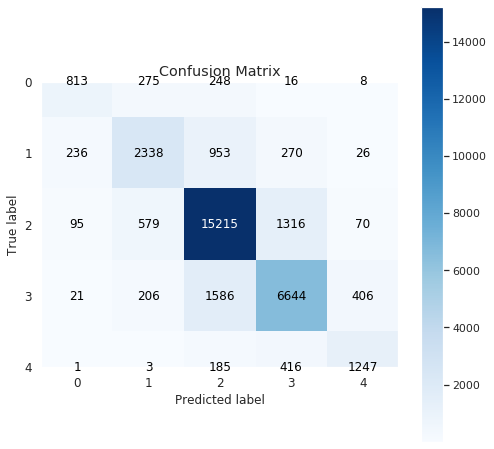

In [61]:
# <2> Bigram LinearSVC

start_time = time.time()
clf = LinearSVC(multi_class='ovr', random_state=1)
clf.fit(tv2_train_features,sentiments_train) # Bigram
predictions = clf.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['LinearSVC_Bigram']['training-time'] = time.time() - start_time
performace_metrics.loc['LinearSVC_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['LinearSVC_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1360
           1       0.69      0.63      0.66      3823
           2       0.85      0.87      0.86     17275
           3       0.76      0.76      0.76      8863
           4       0.69      0.68      0.68      1852

    accuracy                           0.79     33173
   macro avg       0.74      0.71      0.72     33173
weighted avg       0.79      0.79      0.79     33173


Accuracy: 0.7943

Weighted Averaged Validation Metrics
Precision Score: 0.7919
Recall Score: 0.7943
F1 Score: 0.7927
Processing time: 13.098491907119751



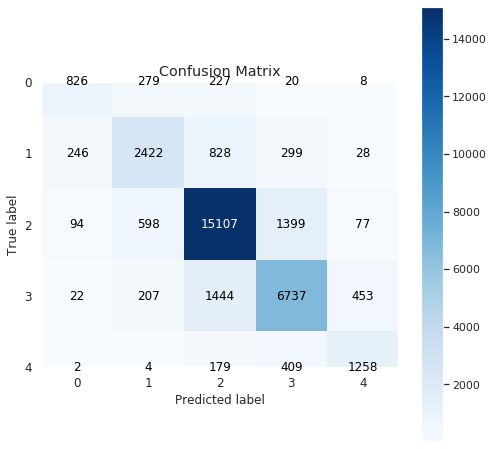

In [62]:
# <3> Trigram LinearSVC

start_time = time.time()
clf = LinearSVC(multi_class='ovr', random_state=1)
clf.fit(tv3_train_features,sentiments_train) # Trigram
predictions = clf.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['LinearSVC_Trigram']['training-time'] = time.time() - start_time
performace_metrics.loc['LinearSVC_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['LinearSVC_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

In [63]:
#3.5 RandomForest  

from sklearn.ensemble import RandomForestClassifier

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1360
           1       0.66      0.47      0.55      3823
           2       0.76      0.90      0.83     17275
           3       0.76      0.62      0.68      8863
           4       0.68      0.53      0.60      1852

    accuracy                           0.74     33173
   macro avg       0.69      0.62      0.65     33173
weighted avg       0.74      0.74      0.73     33173


Accuracy: 0.742

Weighted Averaged Validation Metrics
Precision Score: 0.7369
Recall Score: 0.742
F1 Score: 0.7322
Processing time: 111.38589191436768



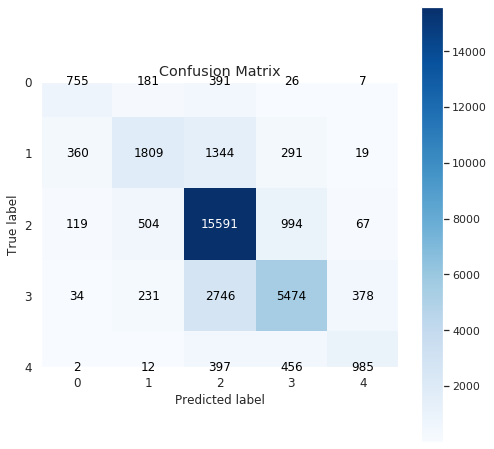

In [64]:
# <1> Unigram RandomForest

start_time = time.time()
rfc = RandomForestClassifier(random_state=1)
rfc.fit(tv1_train_features,sentiments_train) # Unigram
predictions = rfc.predict(tv1_test_features) # Unigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['RandomForest_Unigram']['training-time'] = time.time() - start_time
performace_metrics.loc['RandomForest_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['RandomForest_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.63      0.46      0.53      1360
           1       0.68      0.40      0.50      3823
           2       0.71      0.93      0.80     17275
           3       0.78      0.52      0.63      8863
           4       0.68      0.46      0.55      1852

    accuracy                           0.71     33173
   macro avg       0.70      0.55      0.60     33173
weighted avg       0.72      0.71      0.69     33173


Accuracy: 0.7137

Weighted Averaged Validation Metrics
Precision Score: 0.7175
Recall Score: 0.7137
F1 Score: 0.6949
Processing time: 377.3441061973572



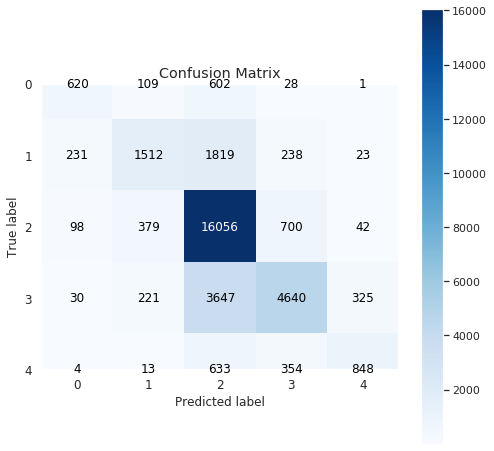

In [65]:
# <2> Bigram RandomForest

start_time = time.time()
rfc = RandomForestClassifier(random_state=1)
rfc.fit(tv2_train_features,sentiments_train) # Bigram
predictions = rfc.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['RandomForest_Bigram']['training-time'] = time.time() - start_time
performace_metrics.loc['RandomForest_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['RandomForest_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.65      0.41      0.50      1360
           1       0.70      0.37      0.48      3823
           2       0.69      0.94      0.80     17275
           3       0.79      0.49      0.61      8863
           4       0.67      0.48      0.56      1852

    accuracy                           0.71     33173
   macro avg       0.70      0.54      0.59     33173
weighted avg       0.72      0.71      0.68     33173


Accuracy: 0.706

Weighted Averaged Validation Metrics
Precision Score: 0.7163
Recall Score: 0.706
F1 Score: 0.6837
Processing time: 575.269150018692



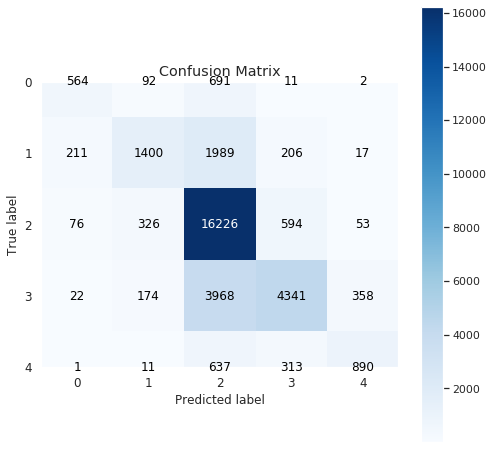

In [66]:
# <3> Trigram RandomForest

start_time = time.time()
rfc = RandomForestClassifier(random_state=1)
rfc.fit(tv3_train_features,sentiments_train) # Trigram
predictions = rfc.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['RandomForest_Trigram']['training-time'] = time.time() - start_time
performace_metrics.loc['RandomForest_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['RandomForest_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

In [73]:
performace_metrics.sort_values(by='accuracy', ascending=False)

,accuracy,F1_score,training-time
LinearSVC_Trigram,0.794321,0.794321,13.2038
LinearSVC_Bigram,0.791517,0.791517,8.6884
LinearSVC_Unigram,0.770868,0.770868,4.43823
logisticRegression_Unigram,0.746179,0.746179,6.74953
RandomForest_Unigram,0.741989,0.741989,111.479
logisticRegression_Bigram,0.738583,0.738583,13.4924
logisticRegression_Trigram,0.734634,0.734634,18.7569
RandomForest_Bigram,0.713713,0.713713,377.437
RandomForest_Trigram,0.706026,0.706026,575.362


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

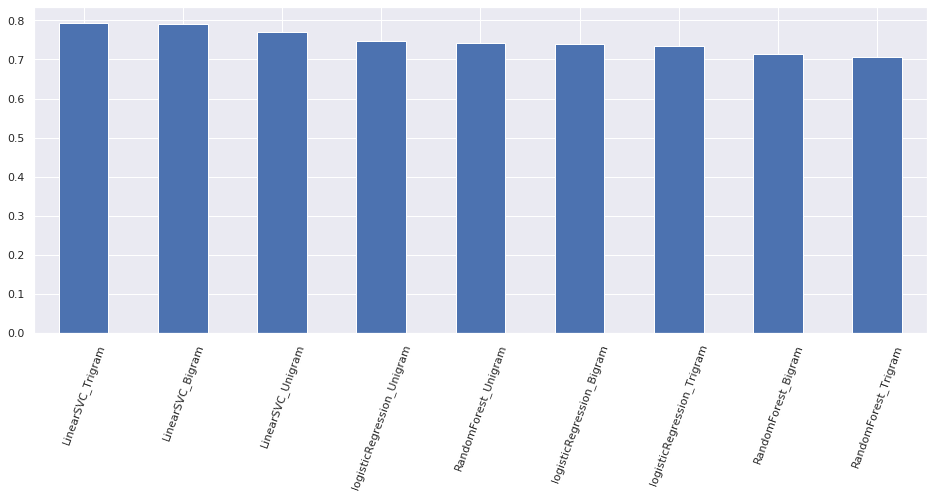

In [68]:
sns.set(rc={'figure.figsize':(16,6)})


performace_metrics.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar")

plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

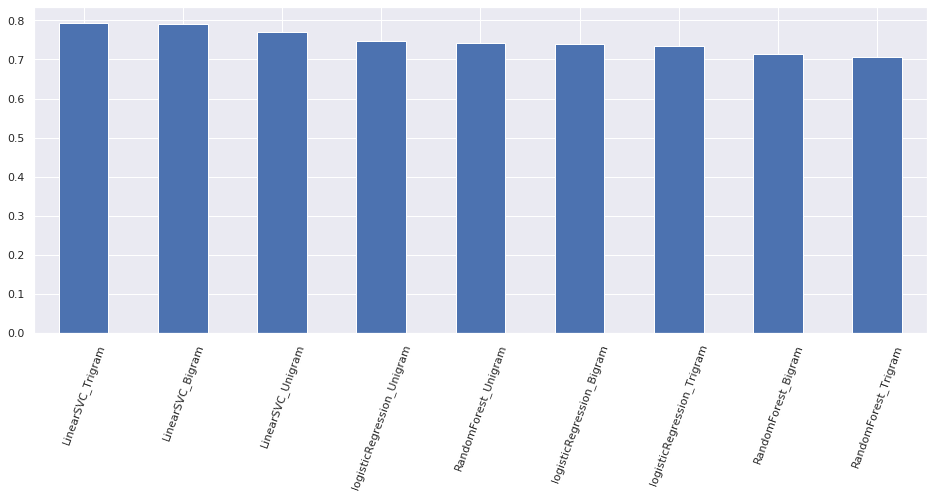

In [69]:
sns.set(rc={'figure.figsize':(16,6)})


performace_metrics.sort_values(by="F1_score", ascending=False).accuracy.plot(kind="bar")

plt.xticks(rotation=70)

In [74]:
performace_metrics.sort_values(by="training-time", ascending=True)

,accuracy,F1_score,training-time
LinearSVC_Unigram,0.770868,0.770868,4.43823
logisticRegression_Unigram,0.746179,0.746179,6.74953
LinearSVC_Bigram,0.791517,0.791517,8.6884
LinearSVC_Trigram,0.794321,0.794321,13.2038
logisticRegression_Bigram,0.738583,0.738583,13.4924
logisticRegression_Trigram,0.734634,0.734634,18.7569
RandomForest_Unigram,0.741989,0.741989,111.479
RandomForest_Bigram,0.713713,0.713713,377.437
RandomForest_Trigram,0.706026,0.706026,575.362


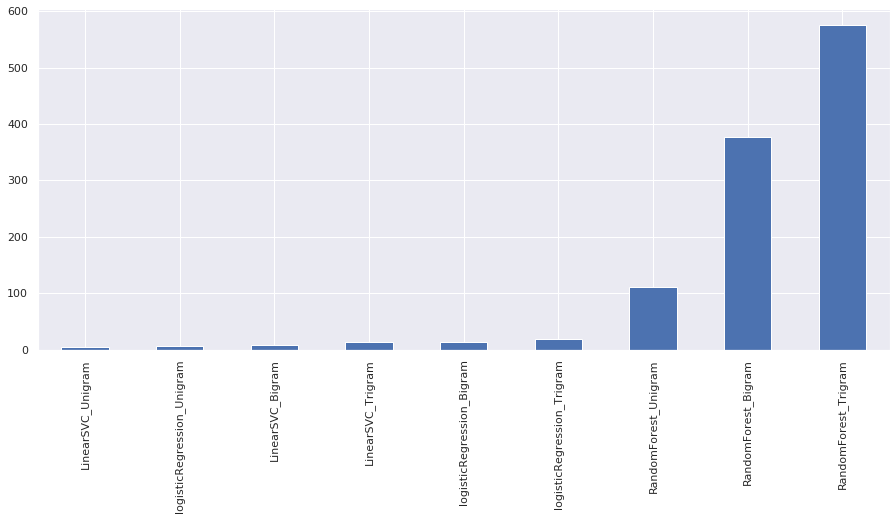

In [78]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
performace_metrics.sort_values(by="training-time", ascending=True)["training-time"].plot(kind="bar")

In [ ]:
#Overall,based on accuray and F1 score, LinearSVC on Trigram, Bigram and Unigram and logisticRegression on Unigram as my prediction models.

In [ ]:
#4. Model Tuning(Feature Selection) 

In [149]:


tuning_performance_metrics = pd.DataFrame(columns=['accuracy','F1_score','training-time'], index=['LinearSVC_Trigram', 'LinearSVC_Bigram', 'LinearSVC_Unigram', 'logisticRegression_Unigram'])



In [99]:
#4.1 LinearSVC tuning (Trigram)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time

clf_grid = LinearSVC(multi_class='ovr', random_state=1)

#training data futher split into 80% for trainning, 20% for validation
X = tv3_train_features
y = sentiments_train
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2, shuffle=True)

gsc_linear_svc = GridSearchCV(
    estimator=clf_grid,
    param_grid={
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e-0, 10e+1],
    },
    scoring='accuracy',
    cv=2
)

grid_result_linear_svc = gsc_linear_svc.fit(xtrain, ytrain)

print()
print("LinearSVC best parameters and score")
print("Best score: %f using %s" % (grid_result_linear_svc.best_score_, grid_result_linear_svc.best_params_))

prediction_tuned = gsc_linear_svc.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned))
print('Processing time:', time.time() - start_time)
print()




LinearSVC best parameters and score
Best score: 0.724270 using {'C': 10, 'tol': 0.1}
accuracy score after tuning: 0.7615117944080186
Processing time: 171.40495586395264



              precision    recall  f1-score   support

           0       0.69      0.64      0.66      1360
           1       0.67      0.66      0.67      3823
           2       0.86      0.86      0.86     17275
           3       0.75      0.77      0.76      8863
           4       0.69      0.69      0.69      1852

    accuracy                           0.79     33173
   macro avg       0.73      0.72      0.73     33173
weighted avg       0.79      0.79      0.79     33173


Accuracy: 0.7928

Weighted Averaged Validation Metrics
Precision Score: 0.7929
Recall Score: 0.7928
F1 Score: 0.7927
Processing time: 21.82845115661621



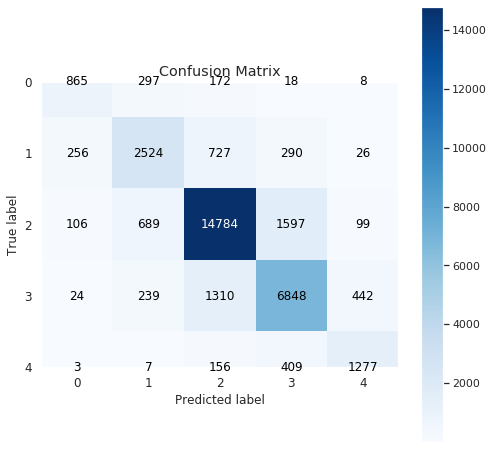

In [150]:
start_time = time.time()
clf = LinearSVC(multi_class='ovr', random_state=1, C=10, tol=0.1)
clf.fit(tv3_train_features,sentiments_train) # Trigram
predictions = clf.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions, average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

tuning_performance_metrics.loc['LinearSVC_Trigram']['training-time'] = time.time() - start_time
tuning_performance_metrics.loc['LinearSVC_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
tuning_performance_metrics.loc['LinearSVC_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='weighted')


In [122]:
#4.2 LinearSVC tuning (Bigram)

clf_grid = LinearSVC(multi_class='ovr', random_state=1)

#training data futher split into 80% for trainning, 20% for validation
X = tv2_train_features
y = sentiments_train
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2, shuffle=True)

gsc_linear_svc = GridSearchCV(
    estimator=clf_grid,
    param_grid={
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e-0, 10e+1],
    },
    scoring='accuracy',
    cv=2
)

grid_result_linear_svc = gsc_linear_svc.fit(xtrain, ytrain)

print()
print("LinearSVC best parameters and score")
print("Best score: %f using %s" % (grid_result_linear_svc.best_score_, grid_result_linear_svc.best_params_))

prediction_tuned = gsc_linear_svc.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned))
print()




LinearSVC best parameters and score
Best score: 0.736620 using {'C': 10, 'tol': 1.0}
accuracy score after tuning: 0.7675032029542542



              precision    recall  f1-score   support

           0       0.69      0.62      0.66      1360
           1       0.67      0.63      0.65      3823
           2       0.84      0.86      0.85     17275
           3       0.75      0.76      0.75      8863
           4       0.71      0.68      0.69      1852

    accuracy                           0.79     33173
   macro avg       0.73      0.71      0.72     33173
weighted avg       0.78      0.79      0.78     33173


Accuracy: 0.7851

Weighted Averaged Validation Metrics
Precision Score: 0.7834
Recall Score: 0.7851
F1 Score: 0.7841
Processing time: 5.544057369232178



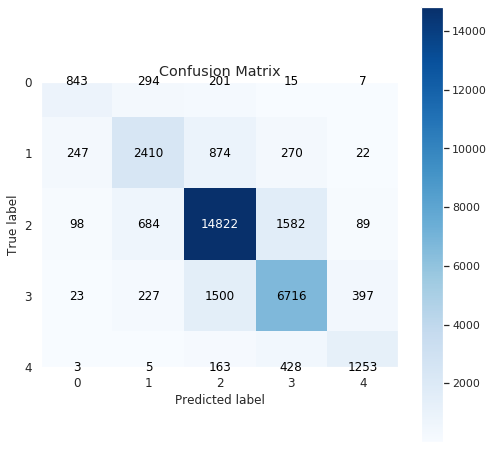

In [151]:
start_time = time.time()
clf = LinearSVC(multi_class='ovr', random_state=1, C=10, tol=1.0)
clf.fit(tv2_train_features,sentiments_train) # Bigram
predictions = clf.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions, average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

tuning_performance_metrics.loc['LinearSVC_Bigram']['training-time'] = time.time() - start_time
tuning_performance_metrics.loc['LinearSVC_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
tuning_performance_metrics.loc['LinearSVC_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='weighted')

In [124]:
#4.3 LinearSVC tuning (Unigram)

clf_grid = LinearSVC(multi_class='ovr', random_state=1)

#training data futher split into 80% for trainning, 20% for validation
X = tv1_train_features
y = sentiments_train
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2, shuffle=True)

gsc_linear_svc = GridSearchCV(
    estimator=clf_grid,
    param_grid={
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e-0, 10e+1],
    },
    scoring='accuracy',
    cv=2
)

grid_result_linear_svc = gsc_linear_svc.fit(xtrain, ytrain)

print()
print("LinearSVC best parameters and score")
print("Best score: %f using %s" % (grid_result_linear_svc.best_score_, grid_result_linear_svc.best_params_))

prediction_tuned = gsc_linear_svc.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned))
print()



LinearSVC best parameters and score
Best score: 0.736404 using {'C': 1.0, 'tol': 1.0}
accuracy score after tuning: 0.7563870676011757



              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1360
           1       0.65      0.56      0.60      3823
           2       0.80      0.88      0.84     17275
           3       0.76      0.70      0.73      8863
           4       0.73      0.64      0.68      1852

    accuracy                           0.77     33173
   macro avg       0.73      0.68      0.70     33173
weighted avg       0.77      0.77      0.77     33173


Accuracy: 0.7703

Weighted Averaged Validation Metrics
Precision Score: 0.7658
Recall Score: 0.7703
F1 Score: 0.7661
Processing time: 1.8309459686279297



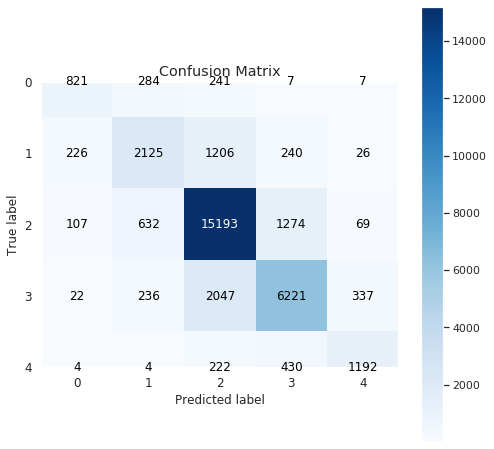

In [152]:
start_time = time.time()
clf = LinearSVC(multi_class='ovr', random_state=1, C=1.0, tol=1.0)
clf.fit(tv1_train_features,sentiments_train) # Unigram
predictions = clf.predict(tv1_test_features) # Unigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions, average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

tuning_performance_metrics.loc['LinearSVC_Unigram']['training-time'] = time.time() - start_time
tuning_performance_metrics.loc['LinearSVC_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
tuning_performance_metrics.loc['LinearSVC_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='weighted')

In [126]:
#4.4 logisticRegression tuning (Unigram)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

clf_grid = LogisticRegression(multi_class='ovr', random_state=1)

#training data futher split into 80% for trainning, 20% for validation
X = tv1_train_features
y = sentiments_train
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2, shuffle=True)

gsc_logistic_regression = GridSearchCV(
    estimator=clf_grid,
    param_grid={
        'solver': ['newton-cg', 'sag', 'saga'],
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-4, 10e-3, 10e-2, 10e-1, 10e-0],
    },
    scoring='accuracy',
    cv=2
)

grid_result_logistic_regression = gsc_logistic_regression.fit(xtrain, ytrain)

print()
print("LogisticRegression best parameters and score")
print("Best score: %f using %s" % (grid_result_logistic_regression.best_score_, grid_result_logistic_regression.best_params_))

prediction_tuned = grid_result_logistic_regression.predict(xvalid)

print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned))
print()



LogisticRegression best parameters and score
Best score: 0.729687 using {'C': 10, 'solver': 'sag', 'tol': 0.1}
accuracy score after tuning: 0.7523551134222625



              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1360
           1       0.65      0.56      0.60      3823
           2       0.80      0.88      0.84     17275
           3       0.76      0.71      0.73      8863
           4       0.75      0.61      0.67      1852

    accuracy                           0.77     33173
   macro avg       0.73      0.67      0.70     33173
weighted avg       0.77      0.77      0.77     33173


Accuracy: 0.7698

Weighted Averaged Validation Metrics
Precision Score: 0.7653
Recall Score: 0.7698
F1 Score: 0.7653
Processing time: 2.5551745891571045



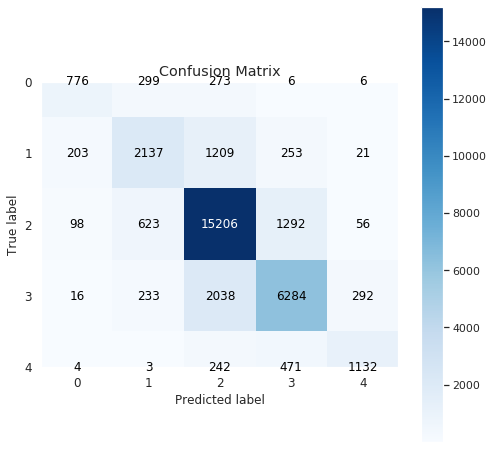

In [153]:
start_time = time.time()
lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1,
                       C=10, tol = 0.1)
lr.fit(tv1_train_features,sentiments_train)
predictions = lr.predict(tv1_test_features)

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))
print('Processing time:', time.time() - start_time)

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

tuning_performance_metrics.loc['logisticRegression_Unigram']['training-time'] = time.time() - start_time
tuning_performance_metrics.loc['logisticRegression_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
tuning_performance_metrics.loc['logisticRegression_Unigram']['F1_score'] = f1_score(sentiments_test, predictions,average='weighted')

In [162]:
# Before tuning
performace_metrics.sort_values(by="accuracy", ascending=False)

,accuracy,F1_score,training-time
LinearSVC_Trigram,0.794321,0.794321,11.6396
LinearSVC_Bigram,0.791517,0.791517,8.6884
LinearSVC_Unigram,0.770868,0.770868,4.43823
logisticRegression_Unigram,0.746179,0.746179,6.74953
RandomForest_Unigram,0.741989,0.741989,111.479
logisticRegression_Bigram,0.738583,0.738583,13.4924
logisticRegression_Trigram,0.734634,0.734634,18.7569
RandomForest_Bigram,0.713713,0.713713,377.437
RandomForest_Trigram,0.706026,0.706026,575.362


In [163]:
#After tuning
tuning_performance_metrics.sort_values(by="accuracy", ascending=False)

,accuracy,F1_score,training-time
LinearSVC_Trigram,0.792753,0.79269,21.9229
LinearSVC_Bigram,0.785096,0.784064,5.63807
LinearSVC_Unigram,0.770265,0.766111,1.92337
logisticRegression_Unigram,0.769753,0.765273,2.64958
